# Dirty Data

## Step 1: Import necessary modules used for data auditing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Step 2: Check some data basics before analysis

In [2]:
#Read the data file
dirty_data = pd.read_csv('29911508_dirty_data.csv')

In [3]:
#Check the length and width of the data file
dirty_data.shape

(291, 14)

In [4]:
#Check the summary of the data file
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 14 columns):
Unnamed: 0               291 non-null object
Uber Type                291 non-null int64
Origin Region            291 non-null int64
Destination Region       291 non-null int64
Origin Latitude          291 non-null float64
Origin Longitude         291 non-null float64
Destination Latitude     291 non-null float64
Destination Longitude    291 non-null float64
Journey Distance(m)      291 non-null float64
Departure Date           291 non-null object
Departure Time           291 non-null object
Travel Time(s)           291 non-null float64
Arrival Time             291 non-null object
Fare$                    291 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 31.9+ KB


In [5]:
#Check the head of data
dirty_data.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3521299090,1,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,9/2/18,19:23:40,4292.40,20:35:12,26.98
1,ID1737622597,0,7,4,-37.861835,144.905716,-37.808170,144.991697,10464.0,21/2/18,19:57:56,3487.86,20:56:03,12.58
2,ID1548439800,0,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,27/5/18,5:28:53,13173.36,9:08:26,33.74
3,ID1212815795,0,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,18/1/18,16:47:51,4292.40,17:59:23,12.09
4,ID5643178107,2,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,6/1/18,18:04:28,13173.36,21:44:01,900.02


In [6]:
#Check the tail of data
dirty_data.tail()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
286,ID1251098956,0,2,1,-37.813249,144.937156,-37.815047,144.960160,2583.0,5/2/18,14:09:21,628.08,14:19:49,7.90
287,ID3582522252,1,5,1,-37.803750,144.918308,-37.814459,144.937509,2751.0,20/3/18,0:31:45,667.08,0:42:52,19.31
288,ID1936438950,0,4,3,-37.802469,145.003365,-37.821161,144.967209,4737.0,27/1/18,0:11:30,1274.34,0:32:44,14.00
289,ID3357800911,1,5,8,-37.806414,144.932265,-37.815834,145.046450,10370.0,7/7/18,20:50:23,2920.86,21:39:03,23.40
290,ID3662750037,1,4,8,-37.800689,144.994321,-37.807202,145.026637,3063.0,5/6/18,21:55:44,795.72,22:08:59,18.82


In [7]:
#Check the descriptive statistic of data
dirty_data.describe()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,0.749141,4.896907,4.896907,-36.540244,144.939027,-36.532103,144.952852,12917.105498,3450.349072,59.962199
std,0.776125,2.504415,2.406104,9.857339,0.097508,9.846108,0.083509,14355.875957,3516.873141,146.404353
min,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,660.000000,189.600000,5.260000
25%,0.000000,3.000000,3.000000,-37.822895,144.928746,-37.819469,144.929623,4737.000000,1230.840000,11.645000
50%,1.000000,5.000000,5.000000,-37.812669,144.957735,-37.814073,144.969989,7895.000000,2152.980000,17.710000
75%,1.000000,7.000000,7.000000,-37.805011,144.992851,-37.805022,144.994913,11630.000000,3695.600000,29.475000
max,3.000000,9.000000,9.000000,38.110916,145.046450,37.822043,145.046450,51032.000000,13204.980000,900.020000


In [8]:
dirty_data.describe(include=['O'])

,Unnamed: 0,Departure Date,Departure Time,Arrival Time
count,291,291,291,291
unique,291,157,290,290
top,ID1794212429,20/4/18,6:34:06,10:46:12
freq,1,5,2,2


## Step 3: Identify Anomalies of Origin and Destination

### Step 3.1: Identify Anomalies of Origin Latitude and Origin Longitude

In [9]:
#Import module to plot a map of origin locations
import folium

#Plot the map of Australia
origin_map = folium.Map(location=[-37.814, 144.96332], zoom_start=11)
palette = sns.color_palette().as_hex()

#Add origin locations into the map of Australia
for index, row in dirty_data.iterrows():
    folium.CircleMarker(location=[row['Origin Latitude'], row['Origin Longitude']], popup = row['Unnamed: 0'],
                        radius=6, color=palette[row['Origin Region'] - 1]
                       ).add_to(origin_map)

origin_map

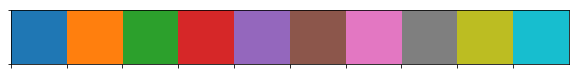

In [10]:
#The Origin Regions are described on the map as the colors below
#The order of Origion Regions (from Region 1 to Region 9) is equal to the order of colors from left to right
sns.palplot(palette)

In [11]:
#As we can see on the map above, base on the colors, some Origion Regions are in wrong position
dirty_data[
    (dirty_data['Unnamed: 0'] == 'ID1719389469') |
    (dirty_data['Unnamed: 0'] == 'ID1324620469') |
    (dirty_data['Unnamed: 0'] == 'ID1237339308') |
    (dirty_data['Unnamed: 0'] == 'ID5966593832') |
    (dirty_data['Unnamed: 0'] == 'ID1947084607') |
    (dirty_data['Unnamed: 0'] == 'ID1795164150') |
    (dirty_data['Unnamed: 0'] == 'ID5180499284') |
    (dirty_data['Unnamed: 0'] == 'ID3378336664') |
    (dirty_data['Unnamed: 0'] == 'ID3314399055') |
    (dirty_data['Unnamed: 0'] == 'ID5757935791') 
          ]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
19,ID3314399055,1,7,8,-37.809783,144.935871,-37.807202,145.026637,8844.0,22/5/18,12:38:51,2249.70,13:16:20,17.37
20,ID1324620469,0,5,7,-37.815366,144.935415,-37.861835,144.905716,10596.0,1/5/18,0:02:13,3471.78,1:00:04,14.30
21,ID1719389469,0,4,4,-37.815486,144.935486,-37.804157,144.993981,5894.0,6/3/18,9:50:29,1495.68,10:15:24,6.64
56,ID3378336664,1,2,5,-37.812669,144.931570,-37.813996,144.932934,1189.0,5/6/18,12:52:23,336.60,12:57:59,11.23
197,ID5180499284,2,2,3,-37.812962,144.931495,-37.821324,144.983380,6133.0,6/6/18,10:20:36,1536.48,10:46:12,113.74
213,ID1947084607,0,2,4,-37.814985,144.927590,-37.803982,145.007587,9107.0,24/1/18,13:46:53,2364.84,14:26:17,12.52
226,ID5966593832,2,1,8,-37.822736,144.947548,-37.815834,145.046450,9316.0,2018-06-31,9:50:23,2704.74,10:35:27,192.91
237,ID5757935791,2,3,2,-37.814120,144.971668,-37.820734,144.948821,2173.0,28/1/18,9:42:06,603.42,9:52:09,59.10
253,ID1237339308,0,1,5,-37.816507,144.945942,-37.810034,144.935960,1317.0,5/5/18,5:48:57,297.72,5:53:54,14.97
277,ID1795164150,0,2,1,-37.814893,144.927202,-37.820490,144.966111,4939.0,18/1/18,16:31:53,1186.02,16:51:39,9.94


In [12]:
#Base on the map, I will make the order of wrong Origion Regions
dirty_data['Origin Region'][21] = 2
dirty_data['Origin Region'][20] = 2
dirty_data['Origin Region'][253] = 2
dirty_data['Origin Region'][226] = 2
dirty_data['Origin Region'][213] = 5
dirty_data['Origin Region'][277] = 5
dirty_data['Origin Region'][197] = 5
dirty_data['Origin Region'][56] = 3
dirty_data['Origin Region'][19] = 2
dirty_data['Origin Region'][237] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ip

In [13]:
#Base on the map, some locations are not in Australia so I will fix them
#The reason is because of incorrect Origin Latitude
dirty_data[dirty_data['Origin Latitude'] > 0]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
45,ID1945049652,0,7,4,37.861835,144.905716,-37.802642,144.993873,11179.0,21/2/18,12:18:08,3659.70,13:19:07,12.06
50,ID1399118395,0,4,3,37.808985,145.008867,-37.822875,144.976522,4244.0,21/7/18,18:40:07,1017.84,18:57:04,13.96
51,ID3412753875,1,9,3,38.110916,144.654173,-37.814464,144.985442,45540.0,14/6/18,4:55:22,10955.82,7:57:57,56.45
52,ID1964330137,0,5,8,37.802547,144.935026,-37.807202,145.026637,9286.0,17/1/18,15:46:58,2374.80,16:26:32,9.86
54,ID1644299810,0,1,8,37.817687,144.959071,-37.815834,145.046450,8232.0,20/4/18,15:27:21,2368.68,16:06:49,9.90


In [14]:
#Create a funciton that change the latitude of location from positive to negative 
#and apply the funciton into the Origin Latitude column
def fix_origin(latitude):
    if latitude > 0:
        latitude = -latitude
    return latitude
dirty_data['Origin Latitude'] = dirty_data['Origin Latitude'].apply(lambda x: fix_origin(x))

In [15]:
#Let's take a loot at the map of Origion Regions after fixing data
#Plot the map of Australia
origin_map = folium.Map(location=[-37.814, 144.96332], zoom_start=11)
palette = sns.color_palette().as_hex()

#Add origin locations into the map of Australia after fixing data
for index, row in dirty_data.iterrows():
    folium.CircleMarker(location=[row['Origin Latitude'], row['Origin Longitude']], popup = row['Unnamed: 0'],
                        radius=6, color=palette[row['Origin Region'] - 1]
                       ).add_to(origin_map)

origin_map

### Step 3.2: Identify Anomalies of Destination Latitude and Destination Longitude

In [16]:
#Import module to plot a map of destination locations
import folium

#Plot the map of Australia
aus_map = folium.Map(location=[-37.814, 144.96332], zoom_start=11)
palette = sns.color_palette().as_hex()

#Add origin locations into the map of Australia
for index, row in dirty_data.iterrows():
    folium.CircleMarker(location=[row['Destination Latitude'], row['Destination Longitude']], popup = row['Unnamed: 0'],
                        radius=6, color=palette[row['Destination Region'] - 1]
                       ).add_to(aus_map)

aus_map

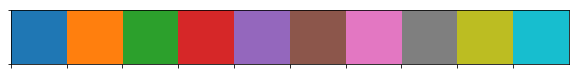

In [17]:
#The Destination Regions are described on the map as the colors below
#The order of Destination Regions (from Region 1 to Region 9) is equal to the order of colors from left to right
sns.palplot(palette)

In [18]:
#As we can see on the map above, base on the colors, some Destination Regions are in wrong position
dirty_data[
    (dirty_data['Unnamed: 0'] == 'ID1129995837') |
    (dirty_data['Unnamed: 0'] == 'ID5326816147') |
    (dirty_data['Unnamed: 0'] == 'ID1293517179') |
    (dirty_data['Unnamed: 0'] == 'ID5282525006') |
    (dirty_data['Unnamed: 0'] == 'ID1250301245') |
    (dirty_data['Unnamed: 0'] == 'ID3582522252') |
    (dirty_data['Unnamed: 0'] == 'ID3176286967') |
    (dirty_data['Unnamed: 0'] == 'ID3812974932') |
    (dirty_data['Unnamed: 0'] == 'ID1450368309') |
    (dirty_data['Unnamed: 0'] == 'ID1521448133') 
          ]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
5,ID5282525006,2,8,1,-37.807202,145.026637,-37.815461,144.940522,8411.0,24/1/18,6:34:06,2178.60,7:10:24,158.45
59,ID3812974932,1,1,3,-37.802387,144.956477,-37.819472,145.008115,5477.0,4/6/18,11:32:21,1304.58,11:54:05,9.83
69,ID3176286967,1,2,1,-37.814861,144.944973,-37.815986,144.937179,868.0,18/2/18,7:58:01,205.44,8:01:26,7.79
92,ID1521448133,0,8,3,-37.815834,145.046450,-37.811281,145.002073,3987.0,27/7/18,9:50:16,1304.46,10:12:00,6.56
140,ID1293517179,0,4,1,-37.800845,145.003167,-37.818869,144.944243,6603.0,25/6/18,12:54:01,1645.20,13:21:26,10.23
181,ID5326816147,2,4,2,-37.811850,145.000396,-37.814988,144.927501,7895.0,12/4/18,3:59:44,1962.48,4:32:26,160.91
204,ID1129995837,0,9,2,-38.110916,144.654173,-37.815193,144.927550,44353.0,26/3/18,4:59:37,10662.90,7:57:19,25.18
214,ID1450368309,0,8,3,-37.815834,145.046450,-37.816795,145.007380,4006.0,3/6/18,9:08:30,1296.48,9:30:06,8.47
283,ID1250301245,0,9,1,-38.110916,144.654173,-37.814116,144.939014,42922.0,7/7/18,23:26:54,10283.16,2:18:17,29.27
287,ID3582522252,1,5,1,-37.803750,144.918308,-37.814459,144.937509,2751.0,20/3/18,0:31:45,667.08,0:42:52,19.31


In [19]:
#Base on the map, I will make the order of wrong Destination Regions
dirty_data['Destination Region'][204] = 5
dirty_data['Destination Region'][181] = 5
dirty_data['Destination Region'][140] = 2
dirty_data['Destination Region'][5] = 2
dirty_data['Destination Region'][283] = 2
dirty_data['Destination Region'][287] = 2
dirty_data['Destination Region'][69] = 2
dirty_data['Destination Region'][59] = 4
dirty_data['Destination Region'][214] = 4
dirty_data['Destination Region'][92] = 4

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ip

In [20]:
#Base on the map, some locations are not in Australia so I will fix them
#The reason is because of incorrect Destination Latitude
dirty_data[dirty_data['Destination Latitude'] > 0]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
62,ID3446448385,1,6,3,-37.790797,144.985865,37.807518,144.991809,2505.0,24/2/18,10:02:08,708.30,10:13:56,9.77
63,ID5467517264,2,5,3,-37.809517,144.929873,37.822043,144.993932,7144.0,26/3/18,16:06:01,1767.12,16:35:28,139.26
66,ID3228662034,1,7,5,-37.861835,144.905716,37.804417,144.929584,11274.0,18/2/18,22:51:32,3623.10,23:51:55,33.70
72,ID1861030970,0,7,8,-37.861835,144.905716,37.815834,145.046450,15151.0,18/2/18,15:42:43,4911.60,17:04:34,16.82
73,ID1218563345,0,4,6,-37.801178,145.003076,37.773803,144.983647,9441.0,16/7/18,18:17:23,2890.92,19:05:33,9.60


In [21]:
#Create a funciton that change the latitude of location from positive to negative 
#and apply the funciton into the Destination Latitude column
def fix_destination(latitude):
    if latitude > 0:
        latitude = -latitude
    return latitude
dirty_data['Destination Latitude'] = dirty_data['Destination Latitude'].apply(lambda x: fix_origin(x))

In [22]:
#Let's take a loot at the map of Destination Regions after fixing data
#Plot the map of Australia
aus_map = folium.Map(location=[-37.814, 144.96332], zoom_start=11)
palette = sns.color_palette().as_hex()

#Add destination locations into the map of Australia after fixing data
for index, row in dirty_data.iterrows():
    folium.CircleMarker(location=[row['Origin Latitude'], row['Origin Longitude']], popup = row['Unnamed: 0'],
                        radius=6, color=palette[row['Origin Region'] - 1]
                       ).add_to(aus_map)

aus_map

### Step 4: Identify Anomalies of Journey Distance

In [23]:
#Import nodes and edges file
nodes = pd.read_csv('nodes.csv')
edges = pd.read_csv('edges.csv')

In [24]:
#Change the name of column of nodes
nodes.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
nodes.head()

,index,lat,lon
0,711327755,-37.807675,144.955873
1,711327756,-37.807094,144.955978
2,711327759,-37.807301,144.957817
3,711327760,-37.807885,144.957719
4,777781264,-37.805221,144.952173


In [25]:
edges.head()

,Unnamed: 0,u,v,distance(m),street type,speed(km/h)
0,0,711327755,711332946,58.0,1,15.0
1,2,711327755,55725841,15.0,2,20.0
2,3,711327755,711327760,165.0,1,15.0
3,4,711327756,703557073,4.0,0,10.0
4,5,711327756,711332946,8.0,1,15.0


In [26]:
#Create a function that returns the index of Origin location
#and Destination location of Dirty Data file from Nodes file
def find_node(lat, lon):
    return nodes[np.isclose(nodes['lat'], lat, rtol=1e-08) & 
                 np.isclose(nodes['lon'], lon, rtol=1e-08)].iloc[0]

#The index of Origin and Destination extracted from Nodes file
#are described as the dataframe below
journey = dirty_data.apply(lambda x: pd.Series({
    'origin': find_node(x['Origin Latitude'], x['Origin Longitude'])['index'],
    'destination': find_node(x['Destination Latitude'], x['Destination Longitude'])['index']
}), axis=1)
journey.head()

,origin,destination
0,1.390575e+09,3.047006e+08
1,1.390575e+09,2.247530e+08
2,1.390575e+09,5.002707e+09
3,1.390575e+09,3.047006e+08
4,1.390575e+09,5.002707e+09


In [27]:
#Calculate the shortest distance and the path between origion and destination
import networkx as nx

G = nx.from_pandas_edgelist(edges, 'u', 'v', ['distance(m)'])

def get_distance(x):
    u = x['origin']
    v = x['destination']
    d, p = nx.single_source_dijkstra(G, source=u, target=v, weight='distance(m)')
    return pd.Series({
        'distance': d,
        'path': p
    })

journey[['distance', 'path']] = journey.apply(get_distance, axis=1)
journey.head()

,origin,destination,distance,path
0,1.390575e+09,3.047006e+08,13986.0,"[1390575046.0, 4940410885.0, 6126053594.0, 240..."
1,1.390575e+09,2.247530e+08,10464.0,"[1390575046.0, 4940410885.0, 6126053594.0, 240..."
2,1.390575e+09,5.002707e+09,50797.0,"[1390575046.0, 4940410885.0, 6126053594.0, 240..."
3,1.390575e+09,3.047006e+08,13986.0,"[1390575046.0, 4940410885.0, 6126053594.0, 240..."
4,1.390575e+09,5.002707e+09,50797.0,"[1390575046.0, 4940410885.0, 6126053594.0, 240..."


In [28]:
#Compare the distance calculated from Edges file and distance from
#dirty data file
#The incorrect distances of dirty data are described as the table below:
dirty_data['Check Distance'] = dirty_data['Journey Distance(m)'] - journey['distance']
dirty_data[dirty_data['Check Distance'] != 0]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Check Distance
6,ID3332718263,1,2,6,-37.825077,144.951362,-37.787442,144.980409,5725.7,23/2/18,5:56:17,1465.14,6:20:42,20.87,-0.3
8,ID1317318399,0,3,6,-37.817809,145.008279,-37.773803,144.983647,10794.9,3/6/18,13:00:24,3258.84,13:54:42,14.25,0.9
9,ID3524903462,1,8,2,-37.807202,145.026637,-37.817242,144.931740,9413.8,6/4/18,8:15:32,2406.24,8:55:38,13.96,3.8
11,ID1947571329,0,2,6,-37.817766,144.946925,-37.787442,144.980409,5445.3,3/7/18,2:44:23,1399.44,3:07:42,13.05,5.3
12,ID1969695446,0,8,7,-37.815834,145.046450,-37.861835,144.905716,15153.0,15/4/18,15:44:51,4917.48,17:06:48,15.70,2.0


In [29]:
#Change incorrect values of Journey Distance into correct values 
distance_error = list(dirty_data[dirty_data['Check Distance'] != 0].index)
dirty_data['Journey Distance(m)'].iloc[distance_error] = journey['distance'].iloc[distance_error]
dirty_data.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Check Distance
0,ID3521299090,1,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,9/2/18,19:23:40,4292.40,20:35:12,26.98,0.0
1,ID1737622597,0,7,4,-37.861835,144.905716,-37.808170,144.991697,10464.0,21/2/18,19:57:56,3487.86,20:56:03,12.58,0.0
2,ID1548439800,0,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,27/5/18,5:28:53,13173.36,9:08:26,33.74,0.0
3,ID1212815795,0,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,18/1/18,16:47:51,4292.40,17:59:23,12.09,0.0
4,ID5643178107,2,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,6/1/18,18:04:28,13173.36,21:44:01,900.02,0.0


### Step 4: Identify Anomalies of Travel Time

In [30]:
#Calculate the shortest distance and path from edges
#according to origin and destination position of dirty data
import networkx as nx
G = nx.from_pandas_edgelist(edges, 'u', 'v', ['distance(m)'])

def get_distance(x):
    u = x['origin']
    v = x['destination']
    d, p = nx.single_source_dijkstra(G, source=u, target=v, weight='distance(m)')
    return pd.Series({
        'distance': d,
        'path': p
    })

journey[['distance', 'path']] = journey.apply(get_distance, axis=1)
journey.head()

,origin,destination,distance,path
0,1.390575e+09,3.047006e+08,13986.0,"[1390575046.0, 4940410885.0, 6126053594.0, 240..."
1,1.390575e+09,2.247530e+08,10464.0,"[1390575046.0, 4940410885.0, 6126053594.0, 240..."
2,1.390575e+09,5.002707e+09,50797.0,"[1390575046.0, 4940410885.0, 6126053594.0, 240..."
3,1.390575e+09,3.047006e+08,13986.0,"[1390575046.0, 4940410885.0, 6126053594.0, 240..."
4,1.390575e+09,5.002707e+09,50797.0,"[1390575046.0, 4940410885.0, 6126053594.0, 240..."


In [31]:
#Calculate the travel time from origin to destination based on 
#the shortest distance and path of the table above
def traveltime(path, edges):
    tt = 0
    for i in range(len(path)-1):
        tt = tt + (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['distance(m)'].values[0] * 1.0 * 3600) / (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['speed(km/h)'].values[0] * 1000)
    return tt

journey['time'] = journey.apply(lambda x: traveltime(x['path'], edges), axis=1)
journey.head()

,origin,destination,distance,path,time
0,1.390575e+09,3.047006e+08,13986.0,"[1390575046.0, 4940410885.0, 6126053594.0, 240...",4292.40
1,1.390575e+09,2.247530e+08,10464.0,"[1390575046.0, 4940410885.0, 6126053594.0, 240...",3487.86
2,1.390575e+09,5.002707e+09,50797.0,"[1390575046.0, 4940410885.0, 6126053594.0, 240...",13173.36
3,1.390575e+09,3.047006e+08,13986.0,"[1390575046.0, 4940410885.0, 6126053594.0, 240...",4292.40
4,1.390575e+09,5.002707e+09,50797.0,"[1390575046.0, 4940410885.0, 6126053594.0, 240...",13173.36


In [32]:
#Compare the travel time calculated from Edges file and travel time
#from dirty data file
#The incorrect travel time of dirty data are described as the table below:
dirty_data['Check Time'] = dirty_data['Travel Time(s)'] - journey['time']
dirty_data[abs(dirty_data['Check Time']) > 1]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Check Distance,Check Time
16,ID3928479389,1,5,1,-37.805230,144.936971,-37.804518,144.971351,3769.0,26/2/18,5:22:54,1028.58,5:40:02,19.79,0.0,1.80
30,ID3369025445,1,2,8,-37.814401,144.939264,-37.807202,145.026637,8591.0,9/1/18,8:21:03,2247.66,8:58:30,11.74,0.0,-26.94
52,ID1964330137,0,5,8,-37.802547,144.935026,-37.807202,145.026637,9286.0,17/1/18,15:46:58,2374.80,16:26:32,9.86,0.0,-35.94
54,ID1644299810,0,1,8,-37.817687,144.959071,-37.815834,145.046450,8232.0,20/4/18,15:27:21,2368.68,16:06:49,9.90,0.0,-1.20
75,ID5997832508,2,8,1,-37.807202,145.026637,-37.811023,144.959053,6586.0,25/6/18,7:14:55,1660.72,7:41:58,121.39,0.0,37.00
76,ID1123246717,0,5,7,-37.813996,144.932934,-37.861835,144.905716,11227.0,9/3/18,12:11:21,3694.18,13:12:42,13.30,0.0,13.00
77,ID1175946151,0,3,8,-37.823055,145.000366,-37.815834,145.046450,5253.0,20/4/18,23:46:55,1597.08,0:13:32,11.39,0.0,-2.22
78,ID3907122338,1,8,4,-37.815834,145.046450,-37.805207,144.994596,5064.0,3/7/18,11:49:01,1693.30,12:15:43,9.91,0.0,91.00
81,ID1764960198,0,1,6,-37.808363,144.957493,-37.790818,144.985793,4129.0,14/1/18,8:24:02,1035.30,8:41:44,9.18,0.0,-27.00
82,ID5458969439,2,7,3,-37.861835,144.905716,-37.808987,144.985233,9809.0,1/7/18,12:45:19,3281.98,13:40:14,247.58,0.0,-14.00


In [33]:
#Change incorrect values of Travel Time into correct values
time_error = list(dirty_data[abs(dirty_data['Check Time']) > 1].index)
dirty_data['Travel Time(s)'].iloc[time_error] = journey['time'].iloc[time_error]
dirty_data.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Check Distance,Check Time
0,ID3521299090,1,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,9/2/18,19:23:40,4292.40,20:35:12,26.98,0.0,1.818989e-12
1,ID1737622597,0,7,4,-37.861835,144.905716,-37.808170,144.991697,10464.0,21/2/18,19:57:56,3487.86,20:56:03,12.58,0.0,1.818989e-12
2,ID1548439800,0,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,27/5/18,5:28:53,13173.36,9:08:26,33.74,0.0,1.818989e-12
3,ID1212815795,0,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,18/1/18,16:47:51,4292.40,17:59:23,12.09,0.0,1.818989e-12
4,ID5643178107,2,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,6/1/18,18:04:28,13173.36,21:44:01,900.02,0.0,1.818989e-12


### Step 5: Identify Anomalies of Departure Date

In [34]:
#List all values of Departure Date column
dirty_data['Departure Date'].unique()

array(['9/2/18', '21/2/18', '27/5/18', '18/1/18', '6/1/18', '24/1/18',
       '23/2/18', '2/1/18', '3/6/18', '6/4/18', '16/5/18', '3/7/18',
       '15/4/18', '26/2/18', '18/7/18', '22/5/18', '1/5/18', '6/3/18',
       '22/1/18', '3/4/18', '27/2/18', '1/1/18', '10/7/18', '4/1/18',
       '22/4/18', '9/1/18', '21/7/18', '12/7/18', '23/1/18', '24/6/18',
       '10/6/18', '15/3/18', '17/3/18', '1/7/18', '13/3/18', '12/6/18',
       '13/2/18', '24/4/18', '1/3/18', '6/2/18', '2/5/18', '14/6/18',
       '17/1/18', '21/1/18', '20/4/18', '5/6/18', '3/2/18', '4/6/18',
       '10/5/18', '9/7/18', '24/2/18', '26/3/18', '23/3/18', '18/2/18',
       '2/7/18', '1/2/18', '26/6/18', '16/7/18', '12/1/18', '25/6/18',
       '9/3/18', '16/4/18', '28/6/18', '14/1/18', '7/2/18', '20/5/18',
       '2/4/18', '19/1/18', '15/2/18', '19/4/18', '27/7/18', '5/4/18',
       '16/2/18', '25/2/18', '10/1/18', '28/3/18', '28/5/18', '25/3/18',
       '17/4/18', '4/4/18', '8/6/18', '8/4/18', '1/4/18', '26/5/18',
       '

In [35]:
#There are some Departure Dates that are in incorrect format so I will change them into the proper format
dirty_data['Departure Date'].replace({
    '2018-13-01':'13/1/18',
    '2018-23-07':'23/7/18',
    '2018-27-04':'27/4/18',
    '2018-14-05':'14/5/18',
    '2018-13-03':'13/3/18',
    '2018-17-05':'17/5/18',
    '2018-19-01':'19/1/18',
    '2018-06-31':'31/6/18',
    '2018-02-30':'30/2/18',
    '2018-04-31':'31/4/18'
},
    inplace = True
)

In [36]:
#There are some Departure Dates that Day exceeds the maximum number of days in a Month
dirty_data[(dirty_data['Departure Date'] == '31/6/18') |
          (dirty_data['Departure Date'] == '30/2/18') |
           (dirty_data['Departure Date'] == '31/4/18')
          ]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Check Distance,Check Time
209,ID1912513177,0,4,8,-37.811618,144.997422,-37.815834,145.046450,4456.0,31/6/18,17:21:34,1406.82,17:45:00,13.30,0.0,0.000000e+00
210,ID3698770636,1,4,7,-37.804973,145.014544,-37.861835,144.905716,12949.0,30/2/18,10:00:02,4069.14,11:07:51,20.51,0.0,-1.364242e-12
212,ID5533236154,2,3,2,-37.823924,144.990595,-37.824825,144.928492,11276.0,31/4/18,23:14:51,2708.34,23:59:59,208.77,0.0,4.547474e-13
216,ID1987362411,0,5,4,-37.806478,144.937878,-37.814894,145.014280,7791.0,31/6/18,11:43:37,1998.72,12:16:55,7.35,0.0,0.000000e+00
219,ID5844031980,2,1,5,-37.803416,144.949932,-37.804863,144.924435,2588.0,31/4/18,18:34:23,657.30,18:45:20,64.83,0.0,-1.136868e-13
220,ID3300685404,1,3,2,-37.818636,144.982767,-37.817811,144.931742,5293.0,31/4/18,4:51:22,1264.08,5:12:26,23.83,0.0,-4.547474e-13
226,ID5966593832,2,2,8,-37.822736,144.947548,-37.815834,145.046450,9316.0,31/6/18,9:50:23,2704.74,10:35:27,192.91,0.0,-9.094947e-13
227,ID1173148250,0,5,4,-37.804331,144.938684,-37.801977,145.001933,6663.0,31/6/18,8:17:23,1724.22,8:46:07,5.34,0.0,2.273737e-13
229,ID1538362286,0,3,7,-37.812129,144.987698,-37.861835,144.905716,9762.0,31/6/18,14:02:30,3283.14,14:57:13,15.61,0.0,-4.547474e-13
233,ID3706809754,1,5,7,-37.809860,144.928936,-37.861835,144.905716,11238.0,30/2/18,20:17:39,3632.46,21:18:11,27.11,0.0,-9.094947e-13


In [37]:
#Change the wrong Departure Dates into correct values
dirty_data['Departure Date'].replace({
    '31/6/18':'1/7/18',
    '30/2/18':'1/3/18',
    '31/4/18':'1/5/18'
},
    inplace = True
)

### Step 6: Identify Anomalies of Uber Type

In [38]:
#Let's take a look at the data
dirty_data.head(20)

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Check Distance,Check Time
0,ID3521299090,1,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,9/2/18,19:23:40,4292.40,20:35:12,26.98,0.0,1.818989e-12
1,ID1737622597,0,7,4,-37.861835,144.905716,-37.808170,144.991697,10464.0,21/2/18,19:57:56,3487.86,20:56:03,12.58,0.0,1.818989e-12
2,ID1548439800,0,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,27/5/18,5:28:53,13173.36,9:08:26,33.74,0.0,1.818989e-12
3,ID1212815795,0,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,18/1/18,16:47:51,4292.40,17:59:23,12.09,0.0,1.818989e-12
4,ID5643178107,2,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,6/1/18,18:04:28,13173.36,21:44:01,900.02,0.0,1.818989e-12
5,ID5282525006,2,8,2,-37.807202,145.026637,-37.815461,144.940522,8411.0,24/1/18,6:34:06,2178.60,7:10:24,158.45,0.0,0.000000e+00
6,ID3332718263,1,2,6,-37.825077,144.951362,-37.787442,144.980409,5726.0,23/2/18,5:56:17,1465.14,6:20:42,20.87,-0.3,-2.273737e-13
7,ID3878261707,1,3,5,-37.816022,144.972301,-37.810014,144.936075,3866.0,2/1/18,16:52:59,915.72,17:08:14,12.51,0.0,2.273737e-13
8,ID1317318399,0,3,6,-37.817809,145.008279,-37.773803,144.983647,10794.0,3/6/18,13:00:24,3258.84,13:54:42,14.25,0.9,-9.094947e-13
9,ID3524903462,1,8,2,-37.807202,145.026637,-37.817242,144.931740,9410.0,6/4/18,8:15:32,2406.24,8:55:38,13.96,3.8,-4.547474e-13


As we can see, for Uber Type 0, the code number will start by number 1; for Uber Type 1, the code number will start by number 3; for Uber Type 2, the code number will start by number 5.

In [39]:
#Check the values of Uber Type
dirty_data['Uber Type'].value_counts()
#Because there are only three types of Uber including 0, 1 and 2 
#so Uber Type 3 is incorrect

0    130
1    107
2     51
3      3
Name: Uber Type, dtype: int64

In [40]:
#The incorrect Uber Types are described as the table below:
dirty_data[dirty_data['Uber Type'] == 3]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Check Distance,Check Time
128,ID1171558594,3,8,2,-37.815834,145.046450,-37.815465,144.935658,10131.0,16/7/18,13:25:53,2829.90,14:13:02,10.99,0.0,1.818989e-12
136,ID1503727933,3,6,4,-37.773845,144.983689,-37.816600,145.005613,7581.0,25/3/18,15:11:03,1734.72,15:39:57,13.06,0.0,0.000000e+00
141,ID3262470451,3,2,3,-37.812439,144.936371,-37.816481,144.992016,5760.0,5/5/18,14:43:43,1367.40,15:06:30,19.43,0.0,-2.273737e-13


In [41]:
#Change the wrong Uber Types into correct values
dirty_data['Uber Type'][128] = 0
dirty_data['Uber Type'][136] = 0
dirty_data['Uber Type'][141] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [42]:
#Let's take a look at the data
dirty_data.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Check Distance,Check Time
0,ID3521299090,1,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,9/2/18,19:23:40,4292.40,20:35:12,26.98,0.0,1.818989e-12
1,ID1737622597,0,7,4,-37.861835,144.905716,-37.808170,144.991697,10464.0,21/2/18,19:57:56,3487.86,20:56:03,12.58,0.0,1.818989e-12
2,ID1548439800,0,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,27/5/18,5:28:53,13173.36,9:08:26,33.74,0.0,1.818989e-12
3,ID1212815795,0,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,18/1/18,16:47:51,4292.40,17:59:23,12.09,0.0,1.818989e-12
4,ID5643178107,2,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,6/1/18,18:04:28,13173.36,21:44:01,900.02,0.0,1.818989e-12


In [43]:
#Drop unecessary columnns
dirty_data = dirty_data.drop(['Check Distance', 'Check Time'], axis = 1)
dirty_data.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3521299090,1,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,9/2/18,19:23:40,4292.40,20:35:12,26.98
1,ID1737622597,0,7,4,-37.861835,144.905716,-37.808170,144.991697,10464.0,21/2/18,19:57:56,3487.86,20:56:03,12.58
2,ID1548439800,0,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,27/5/18,5:28:53,13173.36,9:08:26,33.74
3,ID1212815795,0,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,18/1/18,16:47:51,4292.40,17:59:23,12.09
4,ID5643178107,2,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,6/1/18,18:04:28,13173.36,21:44:01,900.02


In [44]:
#Make some adjustments to dirty data
dirty_data.rename(columns={'Unnamed: 0': ' '}, inplace=True)
dirty_data.set_index(' ', inplace=True)
dirty_data.head()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
,,,,,,,,,,,,,
ID3521299090,1,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,9/2/18,19:23:40,4292.40,20:35:12,26.98
ID1737622597,0,7,4,-37.861835,144.905716,-37.808170,144.991697,10464.0,21/2/18,19:57:56,3487.86,20:56:03,12.58
ID1548439800,0,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,27/5/18,5:28:53,13173.36,9:08:26,33.74
ID1212815795,0,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,18/1/18,16:47:51,4292.40,17:59:23,12.09
ID5643178107,2,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,6/1/18,18:04:28,13173.36,21:44:01,900.02


In [45]:
#Writing data to csv file
dirty_data.to_csv('29911508_dirty_data_solution.csv')

# Missing Data

## Step 1: Check some data basics before analysis

In [46]:
#Read the missing data file
missing_data = pd.read_csv('29911508_missing_value.csv')

In [47]:
#Check the length and width of the data file
missing_data.shape

(87, 14)

In [48]:
#Check the summary of the data file
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 14 columns):
Unnamed: 0               87 non-null object
Uber Type                65 non-null float64
Origin Region            87 non-null int64
Destination Region       87 non-null int64
Origin Latitude          87 non-null float64
Origin Longitude         87 non-null float64
Destination Latitude     87 non-null float64
Destination Longitude    87 non-null float64
Journey Distance(m)      87 non-null int64
Departure Date           87 non-null object
Departure Time           87 non-null object
Travel Time(s)           87 non-null float64
Arrival Time             87 non-null object
Fare$                    67 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 9.6+ KB


In [49]:
#Check the head of data
missing_data.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3401628363,1.0,5,4,-37.796756,144.932701,-37.806914,144.998466,6379,26/7/18,0:32:29,1649.76,0:59:58,21.00
1,ID1894608302,NaN,6,9,-37.787433,144.980377,-38.110916,144.654173,47033,3/1/18,17:53:48,11350.50,21:02:58,20.86
2,ID3480881927,NaN,7,4,-37.861835,144.905716,-37.807382,145.007708,11991,2/3/18,20:37:10,3782.76,21:40:12,25.83
3,ID3606669598,1.0,4,2,-37.812534,145.013081,-37.823676,144.937740,7504,4/6/18,12:02:04,1967.10,12:34:51,18.82
4,ID1404302003,0.0,8,6,-37.815834,145.046450,-37.773845,144.983689,10698,20/1/18,3:53:22,2735.16,4:38:57,18.89


In [50]:
#Check the tail of data
missing_data.tail()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
82,ID1996270353,0.0,8,3,-37.815834,145.046450,-37.819573,145.008231,4191,8/1/18,13:33:23,1353.78,13:55:56,9.58
83,ID1653567886,0.0,8,7,-37.815834,145.046450,-37.861835,144.905716,15151,3/7/18,15:35:14,4917.48,16:57:11,13.06
84,ID1549607154,0.0,1,7,-37.825128,144.956853,-37.861835,144.905716,8095,3/3/18,8:46:10,2787.60,9:32:37,NaN
85,ID1662873481,0.0,1,3,-37.803904,144.936888,-37.822597,145.003134,7065,25/6/18,18:37:49,1777.08,19:07:26,10.84
86,ID3912991085,1.0,4,9,-37.803163,145.009150,-38.110916,144.654173,48173,11/4/18,2:02:54,11668.38,5:17:22,NaN


In [51]:
missing_data.describe(include = ['O'])

,Unnamed: 0,Departure Date,Departure Time,Arrival Time
count,87,87,87,87
unique,87,73,87,87
top,ID1611619014,15/5/18,8:50:41,21:11:46
freq,1,2,1,1


In [52]:
#Check if there are any missing values in the data file
missing_data.isnull().sum()

Unnamed: 0                0
Uber Type                22
Origin Region             0
Destination Region        0
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance(m)       0
Departure Date            0
Departure Time            0
Travel Time(s)            0
Arrival Time              0
Fare$                    20
dtype: int64

- There are two columns containing missing values
- The first one is Uber Type columns and the second one is Fare$ column
- The main purpose of the steps below is building models that make prediction of missing values

## Step 2: Fill missing values of Uber Type

In [53]:
#Identify missing values of Uber Type
missing_data[missing_data['Uber Type'].isnull()]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
1,ID1894608302,NaN,6,9,-37.787433,144.980377,-38.110916,144.654173,47033,3/1/18,17:53:48,11350.50,21:02:58,20.86
2,ID3480881927,NaN,7,4,-37.861835,144.905716,-37.807382,145.007708,11991,2/3/18,20:37:10,3782.76,21:40:12,25.83
5,ID3459920918,NaN,1,4,-37.811866,144.966497,-37.814930,144.999855,3524,16/1/18,2:01:33,848.28,2:15:41,16.96
6,ID3669697658,NaN,9,7,-38.110916,144.654173,-37.861835,144.905716,50797,16/1/18,3:28:59,13204.98,7:09:03,76.69
8,ID3339706879,NaN,2,4,-37.823915,144.929916,-37.814975,145.004575,7376,22/1/18,19:25:48,1956.00,19:58:24,14.76
9,ID1838934084,NaN,9,8,-38.110916,144.654173,-37.815834,145.046450,51032,28/2/18,14:51:07,12681.06,18:22:28,20.29
10,ID3490535627,NaN,6,3,-37.790797,144.985865,-37.824437,144.983050,4214,10/6/18,5:11:29,1178.82,5:31:07,21.81
14,ID1283571613,NaN,7,8,-37.861835,144.905716,-37.807202,145.026637,13986,25/4/18,18:40:16,4292.40,19:51:48,10.94
15,ID1257834345,NaN,3,4,-37.821461,144.977971,-37.802419,144.991780,3174,26/6/18,15:13:25,793.50,15:26:38,8.70
16,ID3499744175,NaN,3,6,-37.818455,144.990462,-37.773803,144.983647,9383,24/4/18,1:36:13,2850.90,2:23:43,24.56


As we can see, for Uber Type 0, the code number will start by number 1; for Uber Type 1, the code number will start by number 3; for Uber Type 2, the code number will start by number 5.

In [54]:
#Now I will fill missing values based on the rule above
#The lists of index of missing uber types devided by first letter of Uber ID
utype0_error = [1,9,14,15,23,25,28,30,31,44]
utype1_error = [2,5,6,8,10,16,19,20,26,36,42]
utype2_error = 18

#Fill missing values
missing_data['Uber Type'].iloc[utype0_error] = 0.0
missing_data['Uber Type'].iloc[utype1_error] = 1.0
missing_data['Uber Type'].iloc[utype2_error] = 2.0

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [55]:
#Let's take a look at the data
missing_data.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3401628363,1.0,5,4,-37.796756,144.932701,-37.806914,144.998466,6379,26/7/18,0:32:29,1649.76,0:59:58,21.00
1,ID1894608302,0.0,6,9,-37.787433,144.980377,-38.110916,144.654173,47033,3/1/18,17:53:48,11350.50,21:02:58,20.86
2,ID3480881927,1.0,7,4,-37.861835,144.905716,-37.807382,145.007708,11991,2/3/18,20:37:10,3782.76,21:40:12,25.83
3,ID3606669598,1.0,4,2,-37.812534,145.013081,-37.823676,144.937740,7504,4/6/18,12:02:04,1967.10,12:34:51,18.82
4,ID1404302003,0.0,8,6,-37.815834,145.046450,-37.773845,144.983689,10698,20/1/18,3:53:22,2735.16,4:38:57,18.89


## Step 3: Fill missing values of Fare

In [56]:
#Identify missing values of Fare
missing_data[missing_data['Fare$'].isnull()]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
46,ID3678398076,1.0,8,3,-37.815834,145.046450,-37.826330,144.966503,8474,5/3/18,3:50:41,2521.20,4:32:42,NaN
47,ID1306031905,0.0,3,2,-37.815834,144.984664,-37.815615,144.946274,4000,20/2/18,5:39:27,943.98,5:55:10,NaN
48,ID5473947594,2.0,1,4,-37.804979,144.977467,-37.810320,145.014792,4337,3/2/18,14:21:11,1112.76,14:39:43,NaN
51,ID3176102676,1.0,8,2,-37.807202,145.026637,-37.813428,144.941097,8321,11/1/18,5:51:06,2073.96,6:25:39,NaN
53,ID1632492752,0.0,9,5,-38.110916,144.654173,-37.805457,144.933335,43706,5/1/18,2:24:40,10484.64,5:19:24,NaN
56,ID1643179553,0.0,2,4,-37.824945,144.948758,-37.799552,145.003624,6672,11/4/18,23:01:10,1739.46,23:30:09,NaN
57,ID1899610358,0.0,6,5,-37.773845,144.983689,-37.804762,144.924148,8001,14/3/18,1:37:04,1753.26,2:06:17,NaN
58,ID3927350714,1.0,5,9,-37.812980,144.933641,-38.110916,144.654173,43754,17/2/18,11:04:30,10507.98,13:59:37,NaN
62,ID3123521542,1.0,6,1,-37.773803,144.983647,-37.801941,144.948707,8254,15/7/18,5:27:54,2598.00,6:11:12,NaN
64,ID1253582939,0.0,7,3,-37.861835,144.905716,-37.809784,144.993257,10438,17/1/18,13:19:29,3459.48,14:17:08,NaN


### Step 3.1: Create a dataframe to train the prediction model

In [57]:
#The dataframe is created by missing_data and dirty_data (after cleaning)
full_missing_data = pd.concat([missing_data, dirty_data], ignore_index=True)
full_missing_data.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


,Arrival Time,Departure Date,Departure Time,Destination Latitude,Destination Longitude,Destination Region,Fare$,Journey Distance(m),Origin Latitude,Origin Longitude,Origin Region,Travel Time(s),Uber Type,Unnamed: 0
0,0:59:58,26/7/18,0:32:29,-37.806914,144.998466,4,21.00,6379.0,-37.796756,144.932701,5,1649.76,1.0,ID3401628363
1,21:02:58,3/1/18,17:53:48,-38.110916,144.654173,9,20.86,47033.0,-37.787433,144.980377,6,11350.50,0.0,ID1894608302
2,21:40:12,2/3/18,20:37:10,-37.807382,145.007708,4,25.83,11991.0,-37.861835,144.905716,7,3782.76,1.0,ID3480881927
3,12:34:51,4/6/18,12:02:04,-37.823676,144.937740,2,18.82,7504.0,-37.812534,145.013081,4,1967.10,1.0,ID3606669598
4,4:38:57,20/1/18,3:53:22,-37.773845,144.983689,6,18.89,10698.0,-37.815834,145.046450,8,2735.16,0.0,ID1404302003


### Step 3.2: Edit type of data and add some columns 

In [58]:
#Change the type of Time and Date in the data file
full_missing_data['Departure Time'] = pd.to_datetime(full_missing_data['Departure Time'], format = '%H:%M:%S').dt.time
full_missing_data['Arrival Time'] = pd.to_datetime(full_missing_data['Arrival Time'], format = '%H:%M:%S').dt.time
full_missing_data['Departure Date'] = pd.to_datetime(full_missing_data['Departure Date'])

In [59]:
#Create a function that returns the values as each period in a day: 
#0 is equal to morning
#1 is equal to afternoon
#2 is equal to evening
def period(time):
    if 12 > time.hour >= 6:
        return '0'
    elif 21 > time.hour >= 12:
        return '1'
    else:
        return '2'

#Add a column that returns each period in a day     
full_missing_data['Day Time'] = full_missing_data['Departure Time'].apply(lambda x: period(x))

In [60]:
#Import necessary modules used for identifying days in a week
from datetime import date, datetime, time
import calendar

#Create a list that returns days in a week
day = []
for i in range(0,len(full_missing_data)):
    day.append(calendar.day_name[full_missing_data['Departure Date'][i].weekday()])
#day

#Add a column that returns days in a week according to different numbers
#0 is equal to weekday
#1 is equal to weekend
full_missing_data['Day'] = day
full_missing_data['Day'].replace({
    'Monday':0, 'Tuesday':0, 'Wednesday':0, 'Thursday':0, 'Friday':0,
    'Saturday':1, 'Sunday':1
}, inplace = True)

In [61]:
#Let's take a look at the data file
full_missing_data.head()

,Arrival Time,Departure Date,Departure Time,Destination Latitude,Destination Longitude,Destination Region,Fare$,Journey Distance(m),Origin Latitude,Origin Longitude,Origin Region,Travel Time(s),Uber Type,Unnamed: 0,Day Time,Day
0,00:59:58,2018-07-26,00:32:29,-37.806914,144.998466,4,21.00,6379.0,-37.796756,144.932701,5,1649.76,1.0,ID3401628363,2,0
1,21:02:58,2018-03-01,17:53:48,-38.110916,144.654173,9,20.86,47033.0,-37.787433,144.980377,6,11350.50,0.0,ID1894608302,1,0
2,21:40:12,2018-02-03,20:37:10,-37.807382,145.007708,4,25.83,11991.0,-37.861835,144.905716,7,3782.76,1.0,ID3480881927,1,1
3,12:34:51,2018-04-06,12:02:04,-37.823676,144.937740,2,18.82,7504.0,-37.812534,145.013081,4,1967.10,1.0,ID3606669598,1,0
4,04:38:57,2018-01-20,03:53:22,-37.773845,144.983689,6,18.89,10698.0,-37.815834,145.046450,8,2735.16,0.0,ID1404302003,2,1


### Step 3.3: Train the prediction model

In [62]:
#Create three dataframes that contains missing values of Fare$ column according to each uber type
null_fare_utype0 = full_missing_data[(full_missing_data['Fare$'].isnull()) &
                               (full_missing_data['Uber Type'] == 0.0)]
null_fare_utype1 = full_missing_data[(full_missing_data['Fare$'].isnull()) &
                               (full_missing_data['Uber Type'] == 1.0)]
null_fare_utype2 = full_missing_data[(full_missing_data['Fare$'].isnull()) &
                               (full_missing_data['Uber Type'] == 2.0)]

In [63]:
#Import modules used for Linear Regression
from sklearn.linear_model import LinearRegression

In [64]:
#Create a dataframe that does not contain any missing values
full_data = full_missing_data[full_missing_data['Fare$'].notnull()]

In [65]:
#Create two dataframes that does not contain any missing values of Uber Type 0
#The first dataframe contains dependent variable: Fare$
#The second dataframe contains only idependent variables: Uber Type, Journey Distance, Travel Time, Day Time, Day
y_fare_utype0 = full_data['Fare$'][full_data['Uber Type'] == 0.0]
X_fare_utype0 = full_data[['Uber Type', 'Journey Distance(m)', 'Travel Time(s)',
              'Day Time', 'Day']][full_data['Uber Type'] == 0.0]

In [66]:
#Train the model to make prediction of missing values of Fare$ column of Uber Type 0 by using two dataframes above
model_fare_utype0 = LinearRegression()
model_fare_utype0.fit(X_fare_utype0,y_fare_utype0)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
#Create a dataframe that contains missing values of Fare$ column of Uber Type 0
Xnull_fare_utype0 = null_fare_utype0[['Uber Type', 'Journey Distance(m)', 'Travel Time(s)', 'Day Time', 'Day']]

#Use the model to predict missing values of Fare$ column of Uber Type 0
ynull_fare_utype0 = model_fare_utype0.predict(Xnull_fare_utype0)
ynull_fare_utype0 = list(ynull_fare_utype0)
ynull_fare_utype0 

[12.154703894801646,
 24.617572864866,
 15.919350304779325,
 13.276229753016677,
 11.805204887873682,
 20.76522902949099,
 27.740899669970922,
 15.018101511600712,
 14.370453848098009,
 15.687493197597451,
 12.78983969462422,
 10.538554905913637]

In [68]:
#Fill the predicted missing values above into the missing data file
missing_fare_utype0 = list(missing_data[(missing_data['Fare$'].isnull()) &
                                      (missing_data['Uber Type'] == 0.0)].index)
missing_data['Fare$'].iloc[missing_fare_utype0] = ynull_fare_utype0 

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [69]:
#Create two dataframes that does not contain any missing values of Uber Type 1
#The first dataframe contains dependent variable: Fare$
#The second dataframe contains only idependent variables: Uber Type, Journey Distance, Travel Time, Day Time, Day
y_fare_utype1 = full_data['Fare$'][full_data['Uber Type'] == 1.0]
X_fare_utype1 = full_data[['Uber Type', 'Journey Distance(m)', 'Travel Time(s)',
              'Day Time', 'Day']][full_data['Uber Type'] == 1.0]

In [70]:
#Train the model to make prediction of missing values of Fare$ column of Uber Type 1 by using two dataframes above
model_fare_utype1 = LinearRegression()
model_fare_utype1.fit(X_fare_utype1,y_fare_utype1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
#Create a dataframe that contains missing values of Fare$ column of Uber Type 1
Xnull_fare_utype1 = null_fare_utype1[['Uber Type', 'Journey Distance(m)', 'Travel Time(s)', 'Day Time', 'Day']]

#Use the model to predict missing values of Fare$ column of Uber Type 1
ynull_fare_utype1 = model_fare_utype1.predict(Xnull_fare_utype1)
ynull_fare_utype1 = list(ynull_fare_utype1)
ynull_fare_utype1 

[25.31977638062297,
 23.303253755023388,
 49.47312832600649,
 27.832456057818984,
 28.3988198005915,
 64.41016188245118]

In [72]:
#Fill the predicted missing values above into the missing data file
missing_fare_utype1 = list(missing_data[(missing_data['Fare$'].isnull()) &
                                      (missing_data['Uber Type'] == 1.0)].index)
missing_data['Fare$'].iloc[missing_fare_utype1] = ynull_fare_utype1

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [73]:
#Create two dataframes that does not contain any missing values of Uber Type 2
#The first dataframe contains dependent variable: Fare$
#The second dataframe contains only idependent variables: Uber Type, Journey Distance, Travel Time, Day Time, Day
y_fare_utype2 = full_data['Fare$'][full_data['Uber Type'] == 2.0]
X_fare_utype2 = full_data[['Uber Type', 'Journey Distance(m)', 'Travel Time(s)',
              'Day Time', 'Day']][full_data['Uber Type'] == 2.0]

In [74]:
#Train the model to make prediction of missing values of Fare$ column of Uber Type 2 by using two dataframes above
model_fare_utype2 = LinearRegression()
model_fare_utype2.fit(X_fare_utype2,y_fare_utype2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
#Create a dataframe that contains missing values of Fare$ column of Uber Type 2
Xnull_fare_utype2 = null_fare_utype2[['Uber Type', 'Journey Distance(m)', 'Travel Time(s)', 'Day Time', 'Day']]

#Use the model to predict missing values of Fare$ column of Uber Type 2
ynull_fare_utype2 = model_fare_utype1.predict(Xnull_fare_utype2)
ynull_fare_utype2 = list(ynull_fare_utype2)
ynull_fare_utype2 

[14.30975807734198, 27.9446526511746]

In [76]:
#Fill the predicted missing values above into the missing data file
missing_fare_utype2 = list(missing_data[(missing_data['Fare$'].isnull()) &
                                      (missing_data['Uber Type'] == 2.0)].index)
missing_data['Fare$'].iloc[missing_fare_utype2] = ynull_fare_utype2

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [77]:
#Let's take a look at the data file
missing_data.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3401628363,1.0,5,4,-37.796756,144.932701,-37.806914,144.998466,6379,26/7/18,0:32:29,1649.76,0:59:58,21.00
1,ID1894608302,0.0,6,9,-37.787433,144.980377,-38.110916,144.654173,47033,3/1/18,17:53:48,11350.50,21:02:58,20.86
2,ID3480881927,1.0,7,4,-37.861835,144.905716,-37.807382,145.007708,11991,2/3/18,20:37:10,3782.76,21:40:12,25.83
3,ID3606669598,1.0,4,2,-37.812534,145.013081,-37.823676,144.937740,7504,4/6/18,12:02:04,1967.10,12:34:51,18.82
4,ID1404302003,0.0,8,6,-37.815834,145.046450,-37.773845,144.983689,10698,20/1/18,3:53:22,2735.16,4:38:57,18.89


In [78]:
#Check if there are any missing values in data file
missing_data.isnull().sum()

Unnamed: 0               0
Uber Type                0
Origin Region            0
Destination Region       0
Origin Latitude          0
Origin Longitude         0
Destination Latitude     0
Destination Longitude    0
Journey Distance(m)      0
Departure Date           0
Departure Time           0
Travel Time(s)           0
Arrival Time             0
Fare$                    0
dtype: int64

In [79]:
missing_data.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3401628363,1.0,5,4,-37.796756,144.932701,-37.806914,144.998466,6379,26/7/18,0:32:29,1649.76,0:59:58,21.00
1,ID1894608302,0.0,6,9,-37.787433,144.980377,-38.110916,144.654173,47033,3/1/18,17:53:48,11350.50,21:02:58,20.86
2,ID3480881927,1.0,7,4,-37.861835,144.905716,-37.807382,145.007708,11991,2/3/18,20:37:10,3782.76,21:40:12,25.83
3,ID3606669598,1.0,4,2,-37.812534,145.013081,-37.823676,144.937740,7504,4/6/18,12:02:04,1967.10,12:34:51,18.82
4,ID1404302003,0.0,8,6,-37.815834,145.046450,-37.773845,144.983689,10698,20/1/18,3:53:22,2735.16,4:38:57,18.89


In [80]:
#Make some adjustments to dirty data
missing_data.rename(columns={'Unnamed: 0': ' '}, inplace=True)
missing_data.set_index(' ', inplace=True)
missing_data.head()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
,,,,,,,,,,,,,
ID3401628363,1.0,5,4,-37.796756,144.932701,-37.806914,144.998466,6379,26/7/18,0:32:29,1649.76,0:59:58,21.00
ID1894608302,0.0,6,9,-37.787433,144.980377,-38.110916,144.654173,47033,3/1/18,17:53:48,11350.50,21:02:58,20.86
ID3480881927,1.0,7,4,-37.861835,144.905716,-37.807382,145.007708,11991,2/3/18,20:37:10,3782.76,21:40:12,25.83
ID3606669598,1.0,4,2,-37.812534,145.013081,-37.823676,144.937740,7504,4/6/18,12:02:04,1967.10,12:34:51,18.82
ID1404302003,0.0,8,6,-37.815834,145.046450,-37.773845,144.983689,10698,20/1/18,3:53:22,2735.16,4:38:57,18.89


In [81]:
#Writing data to csv file
missing_data.to_csv('29911508.missing_value_solution.csv')

# Outliers

## Step 1: Check some data basics before analysis

In [82]:
#Read the data file
outliers = pd.read_csv('29911508_outliers.csv')

In [83]:
#Check the length and width of the data file
outliers.shape

(98, 15)

In [84]:
#Check the summary of the data file
outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 15 columns):
Unnamed: 0               98 non-null int64
Unnamed: 0.1             98 non-null object
Uber Type                98 non-null int64
Origin Region            98 non-null int64
Destination Region       98 non-null int64
Origin Latitude          98 non-null float64
Origin Longitude         98 non-null float64
Destination Latitude     98 non-null float64
Destination Longitude    98 non-null float64
Journey Distance(m)      98 non-null float64
Departure Date           98 non-null object
Departure Time           98 non-null object
Travel Time(s)           98 non-null float64
Arrival Time             98 non-null object
Fare$                    98 non-null float64
dtypes: float64(7), int64(4), object(4)
memory usage: 11.6+ KB


In [85]:
#Check the head of data
outliers.head()

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,0,ID3789090373,1,7,5,-37.861835,144.905716,-37.808145,144.928992,11310.0,2018-01-14,03:26:20,3660.96,4:27:20,36.21
1,1,ID1917019507,0,5,2,-37.804136,144.917720,-37.814805,144.944860,3090.0,2018-06-10,09:37:54,724.26,9:49:58,9.55
2,2,ID1466639867,0,2,1,-37.818009,144.945916,-37.817401,144.970546,2544.0,2018-01-19,11:05:04,618.78,11:15:22,3.53
3,3,ID3915387451,1,4,1,-37.812907,145.013014,-37.818835,144.954676,5795.0,2018-05-08,18:43:17,1390.74,19:06:27,15.11
4,4,ID1116776465,0,1,8,-37.816568,144.966664,-37.815834,145.046450,7493.0,2018-04-25,02:42:00,2182.38,3:18:22,13.25


In [86]:
#Check the tail of data
outliers.tail()

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
93,93,ID1980578032,0,9,4,-38.110916,144.654173,-37.802412,145.009461,48155.0,2018-01-22,23:00:17,11773.86,2:16:30,25.25
94,94,ID1416313562,0,9,4,-38.110916,144.654173,-37.815877,145.004430,47317.0,2018-04-23,13:39:59,11384.70,16:49:43,21.77
95,95,ID1557027072,0,8,3,-37.807202,145.026637,-37.824432,144.988745,5232.0,2018-01-01,00:44:01,1264.56,1:05:05,4.75
96,96,ID3686730532,1,1,8,-37.807347,144.942818,-37.815834,145.046450,9442.0,2018-07-12,08:03:01,2679.90,8:47:40,17.39
97,97,ID3129693032,1,3,2,-37.823119,144.988502,-37.814985,144.927590,7009.0,2018-02-22,14:43:26,1555.56,15:09:21,8.68


In [87]:
#Check the descriptive statistic of data
outliers.describe()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,48.500000,0.479592,4.969388,4.489796,-37.864498,144.912173,-37.842904,144.936809,16961.775510,4377.835102,42.232296
std,28.434134,0.596028,2.756264,2.710213,0.111262,0.120129,0.087702,0.098169,17634.248736,4247.241516,141.778526
min,0.000000,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,842.000000,193.080000,2.205000
25%,24.250000,0.000000,2.250000,2.000000,-37.861835,144.905716,-37.820533,144.929077,4757.500000,1224.855000,10.267500
50%,48.500000,0.000000,5.000000,4.000000,-37.815834,144.945441,-37.815834,144.951729,9161.000000,2787.990000,14.790000
75%,72.750000,1.000000,7.000000,7.000000,-37.807238,144.985608,-37.807248,144.987590,35121.250000,8777.265000,24.867500
max,97.000000,2.000000,9.000000,9.000000,-37.773803,145.046450,-37.773803,145.046450,51061.000000,13204.980000,1109.910000


In [88]:
outliers.describe(include = ['O'])

,Unnamed: 0.1,Departure Date,Departure Time,Arrival Time
count,98,98,98,98
unique,98,79,98,98
top,ID1925899672,2018-07-12,15:01:23,2:52:20
freq,1,3,1,1


## Step 2: Check if there are any outliers in data file

### Step 2.1: Check outliers of Uber Type, Origin Region and Destination Region

In [89]:
#Check Uber Type
#No outliers
outliers['Uber Type'].value_counts()

0    56
1    37
2     5
Name: Uber Type, dtype: int64

In [90]:
#Check Origin Region
#No outliers
outliers['Origin Region'].value_counts()

9    16
1    13
7    12
2    12
3    11
6    10
5     9
4     9
8     6
Name: Origin Region, dtype: int64

In [91]:
#Check Destination Region
#No outliers
outliers['Destination Region'].value_counts()

1    19
3    14
5    12
8    10
7    10
2    10
9     9
4     8
6     6
Name: Destination Region, dtype: int64

### Step 2.2: Check outliers of Origin Latitude, Origin Longitude, Destination Latitude and Destination Longitude

- Use boxplot to check outliers

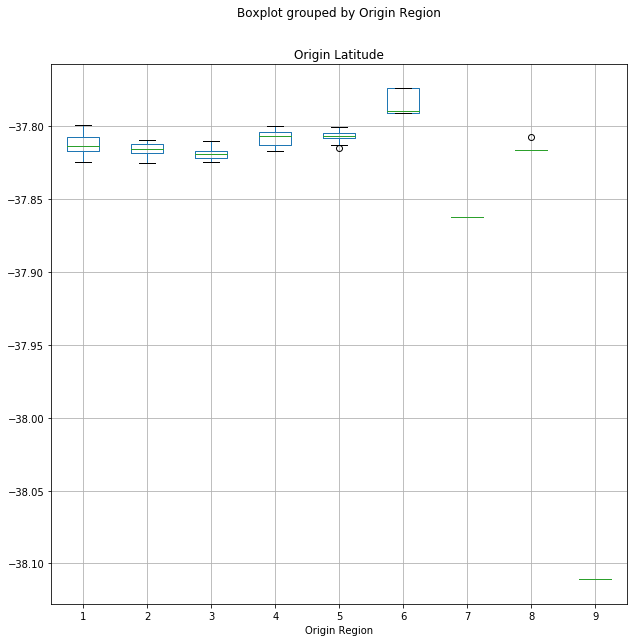

In [92]:
outliers.boxplot(column = 'Origin Latitude', by = 'Origin Region', figsize = (10,10))

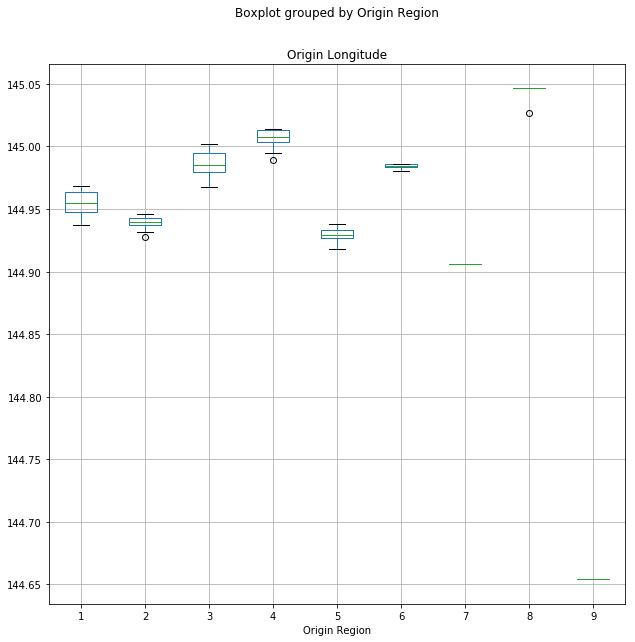

In [93]:
outliers.boxplot(column = 'Origin Longitude', by = 'Origin Region', figsize = (10,10))

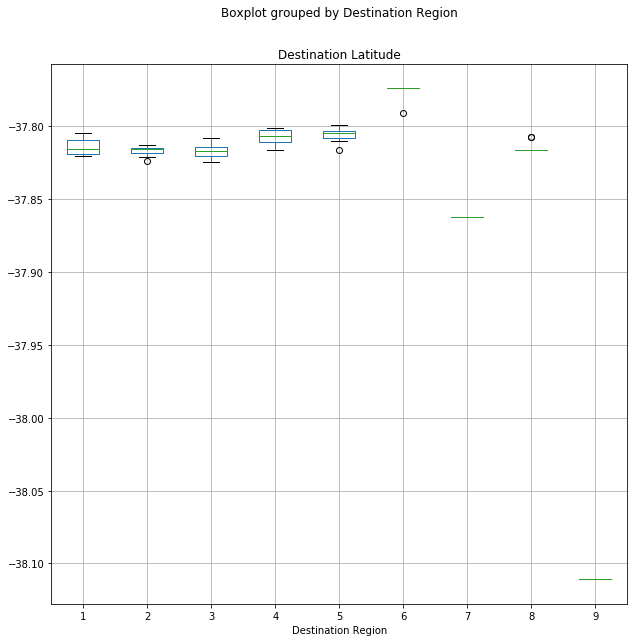

In [94]:
outliers.boxplot(column = 'Destination Latitude', by = 'Destination Region', figsize = (10,10))

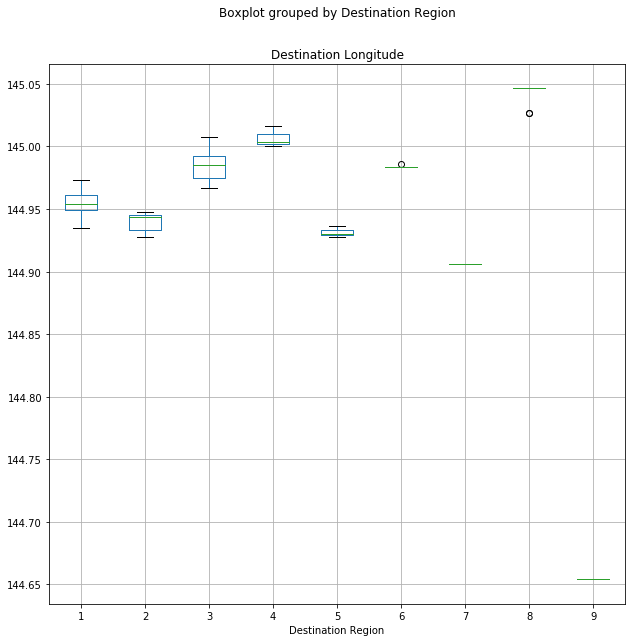

In [95]:
outliers.boxplot(column = 'Destination Longitude', by = 'Destination Region', figsize = (10,10))

Identify outliers

In [96]:
print(outliers['Origin Latitude'][outliers['Origin Region'] == 5].min())
print(outliers['Origin Latitude'][outliers['Origin Region'] == 8].max())

-37.8149608
-37.807202


In [97]:
print(outliers['Origin Longitude'][outliers['Origin Region'] == 2].min())
print(outliers['Origin Longitude'][outliers['Origin Region'] == 4].min())
print(outliers['Origin Longitude'][outliers['Origin Region'] == 8].min())

144.9273907
144.9890489
145.0266373


In [98]:
print(outliers['Destination Latitude'][outliers['Destination Region'] == 2].min())
print(outliers['Destination Latitude'][outliers['Destination Region'] == 5].min())
print(outliers['Destination Latitude'][outliers['Destination Region'] == 6].min())
print(outliers['Destination Latitude'][outliers['Destination Region'] == 8].max())

-37.8236612
-37.8164324
-37.7907967
-37.807202


In [99]:
print(outliers['Destination Longitude'][outliers['Destination Region'] == 6].max())
print(outliers['Destination Longitude'][outliers['Destination Region'] == 8].min())

144.985865
145.0266373


As we can see, these values above cannot be considered as outliers since they are not different from normal behaviour of the data. Thus, they cannot be removed from the data.

### Step 2.3: Check outliers of Journey Distance

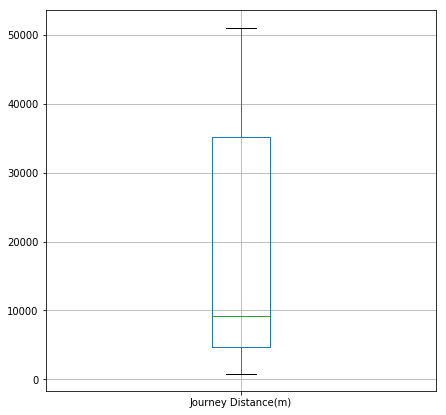

In [100]:
outliers.boxplot(column = 'Journey Distance(m)', figsize = (7,7))

From the plot above, Journey Distance does not have any outliers.

### Step 2.4: Check outliers of Travel Time

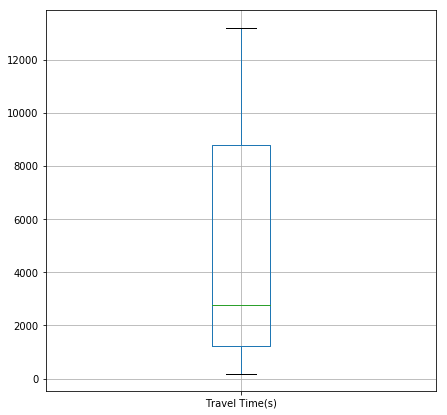

In [101]:
outliers.boxplot(column = 'Travel Time(s)', figsize = (7,7))

From the plot above, Travel Time does not have any outliers.

### Step 2.5: Check outliers of Fare

To check outliers of Fare, I will prediction model from Missing Data to make prediction of Fare (dependent variable) based on independent variables. Then, boxplot will be used to identify if there are any outliers in Fare.

#### Step 2.5.1: Create a dataframe used to check outliers of Fare

In [102]:
#The dataframe is created by dirty data, missing data and outliers
outliers_copy = outliers
outliers_copy = outliers_copy.drop(['Unnamed: 0'], axis = 1)
outliers_copy.columns = ['Unnamed: 0', 'Uber Type', 'Origin Region',
                      'Destination Region', 'Origin Latitude', 'Origin Longitude',
                         'Destination Latitude', 'Destination Longitude', 
                      'Journey Distance(m)', 'Departure Date', 'Departure Time',
                      'Travel Time(s)', 'Arrival Time', 'Fare$']
full_data = pd.concat([outliers_copy, dirty_data, missing_data], ignore_index = True)
full_data.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  if __name__ == '__main__':


,Arrival Time,Departure Date,Departure Time,Destination Latitude,Destination Longitude,Destination Region,Fare$,Journey Distance(m),Origin Latitude,Origin Longitude,Origin Region,Travel Time(s),Uber Type,Unnamed: 0
0,4:27:20,2018-01-14,03:26:20,-37.808145,144.928992,5,36.21,11310.0,-37.861835,144.905716,7,3660.96,1.0,ID3789090373
1,9:49:58,2018-06-10,09:37:54,-37.814805,144.944860,2,9.55,3090.0,-37.804136,144.917720,5,724.26,0.0,ID1917019507
2,11:15:22,2018-01-19,11:05:04,-37.817401,144.970546,1,3.53,2544.0,-37.818009,144.945916,2,618.78,0.0,ID1466639867
3,19:06:27,2018-05-08,18:43:17,-37.818835,144.954676,1,15.11,5795.0,-37.812907,145.013014,4,1390.74,1.0,ID3915387451
4,3:18:22,2018-04-25,02:42:00,-37.815834,145.046450,8,13.25,7493.0,-37.816568,144.966664,1,2182.38,0.0,ID1116776465


#### Step 2.5.2: Edit type of data and add some columns¶

In [103]:
#Change the type of Time and Date in the data file
full_data['Departure Time'] = pd.to_datetime(full_data['Departure Time'], format = '%H:%M:%S').dt.time
full_data['Arrival Time'] = pd.to_datetime(full_data['Arrival Time'], format = '%H:%M:%S').dt.time
full_data['Departure Date'] = pd.to_datetime(full_data['Departure Date'])

In [104]:
#Import necessary modules used for identifying days in a week
from datetime import date, datetime, time
import calendar

#Create a list that returns days in a week
day = []
for i in range(0,len(full_data)):
    day.append(calendar.day_name[full_data['Departure Date'][i].weekday()])
#day

#Add a column that returns days in a week according to different numbers
#0 is equal to weekday
#1 is equal to weekend
full_data['Day'] = day
full_data['Day'].replace({
    'Monday':0, 'Tuesday':0, 'Wednesday':0, 'Thursday':0, 'Friday':0,
    'Saturday':1, 'Sunday':1
}, inplace = True)

In [105]:
#Create a function that returns the values as each period in a day: 
#0 is equal to morning
#1 is equal to afternoon
#2 is equal to evening
def period(time):
    if 12 > time.hour >= 6:
        return 0
    elif 21 > time.hour >= 12:
        return 1
    else:
        return 2

#Add a column that returns each period in a day     
full_data['Day Time'] = full_data['Departure Time'].apply(lambda x: period(x))

In [106]:
full_data.head()

,Arrival Time,Departure Date,Departure Time,Destination Latitude,Destination Longitude,Destination Region,Fare$,Journey Distance(m),Origin Latitude,Origin Longitude,Origin Region,Travel Time(s),Uber Type,Unnamed: 0,Day,Day Time
0,04:27:20,2018-01-14,03:26:20,-37.808145,144.928992,5,36.21,11310.0,-37.861835,144.905716,7,3660.96,1.0,ID3789090373,1,2
1,09:49:58,2018-06-10,09:37:54,-37.814805,144.944860,2,9.55,3090.0,-37.804136,144.917720,5,724.26,0.0,ID1917019507,1,0
2,11:15:22,2018-01-19,11:05:04,-37.817401,144.970546,1,3.53,2544.0,-37.818009,144.945916,2,618.78,0.0,ID1466639867,0,0
3,19:06:27,2018-05-08,18:43:17,-37.818835,144.954676,1,15.11,5795.0,-37.812907,145.013014,4,1390.74,1.0,ID3915387451,0,1
4,03:18:22,2018-04-25,02:42:00,-37.815834,145.046450,8,13.25,7493.0,-37.816568,144.966664,1,2182.38,0.0,ID1116776465,0,2


In [107]:
#Create three dataframes that contains of each uber type
utype0 = full_data[full_data['Uber Type'] == 0]
utype1 = full_data[full_data['Uber Type'] == 1]
utype2 = full_data[full_data['Uber Type'] == 2]

In [108]:
#Use the model to predict Fare of Uber Type 0
Xpred_fare_utype0 = utype0[['Uber Type', 'Journey Distance(m)', 'Travel Time(s)', 'Day Time', 'Day']]
ypred_fare_utype0 = model_fare_utype0.predict(Xpred_fare_utype0)
ypred_fare_utype0 = list(ypred_fare_utype0)
ypred_fare_utype0

[8.207531657944696,
 5.268397244275533,
 13.603499657534728,
 27.76337833267501,
 14.343711238661417,
 9.64786777548483,
 14.353492236813919,
 11.902712983275881,
 11.596543662430246,
 23.641549372209553,
 26.66111933634705,
 9.244636304484029,
 8.576734459776494,
 17.473372544156206,
 11.77589492435319,
 20.58909136133412,
 11.426176331603054,
 8.822852105603125,
 5.978929922421962,
 22.338250608361264,
 24.36795068083083,
 25.89584277144676,
 25.7713717541004,
 10.035725837981234,
 13.566797020782042,
 12.378970615892078,
 14.329561485699866,
 14.332255958503147,
 11.519228580495604,
 17.7702836167887,
 14.853766076651453,
 11.144855663484572,
 27.305829408740863,
 11.170461848075925,
 8.430366023628835,
 10.912913729750128,
 9.216790914774762,
 14.648230086312545,
 14.5900840519777,
 9.089080345912834,
 21.28983211185875,
 24.325247311352953,
 12.811177194621681,
 14.82492757019839,
 27.04322942692923,
 16.797523108958654,
 12.108273231380533,
 10.305966067283254,
 14.27403135410580

In [109]:
#Use the model to predict Fare of Uber Type 1
Xpred_fare_utype1 = utype1[['Uber Type', 'Journey Distance(m)', 'Travel Time(s)', 'Day Time', 'Day']]
ypred_fare_utype1 = model_fare_utype1.predict(Xpred_fare_utype1)
ypred_fare_utype1 = list(ypred_fare_utype1)
ypred_fare_utype1

[32.309299975883796,
 15.403233638575841,
 19.745804529540404,
 60.31922866900513,
 22.462761154703678,
 25.78699464434017,
 13.925275628295413,
 11.692957690604377,
 14.744398666150776,
 65.85999222194849,
 14.67994207605855,
 21.091278012202743,
 11.574861476288396,
 61.48268463461932,
 25.816682158971226,
 14.1921802818132,
 51.30584818332103,
 13.503656867790106,
 29.29677018895808,
 27.208321411585786,
 17.65870428798593,
 28.008775047409387,
 47.816848903452865,
 53.033404629489695,
 15.505482917900853,
 22.876912154220854,
 7.677697829402886,
 14.036792733883782,
 23.524442963539116,
 13.776726291848615,
 18.328947698713097,
 57.883329619602456,
 56.99836296538895,
 8.678464714888888,
 17.851679895513577,
 15.751299897427689,
 16.010574410989868,
 29.779342327612724,
 20.838188101174055,
 13.468687383750648,
 14.51018885770087,
 19.07369100497865,
 25.209865107622658,
 18.95291341247216,
 17.226161275436723,
 27.454652215906435,
 13.651620435170134,
 16.1449557755074,
 11.947040

In [110]:
#Use the model to predict Fare of Uber Type 2
Xpred_fare_utype2 = utype2[['Uber Type', 'Journey Distance(m)', 'Travel Time(s)', 'Day Time', 'Day']]
ypred_fare_utype2 = model_fare_utype2.predict(Xpred_fare_utype2)
ypred_fare_utype2 = list(ypred_fare_utype2)
ypred_fare_utype2

[755.6754601664697,
 551.6093288852186,
 110.18606599342829,
 42.16137509773064,
 196.2711123248538,
 769.9016246743819,
 161.7641802463865,
 787.1324198032363,
 36.59849569763881,
 282.89998048060613,
 395.3658676262097,
 120.30847052197775,
 812.8282161359322,
 126.02009815139184,
 277.2851125864539,
 642.6721717820487,
 577.4357656891441,
 48.48321790027658,
 39.03913977915171,
 104.48857254050324,
 56.35253561765159,
 569.8812893700923,
 65.91579828613003,
 648.8484498009531,
 563.0941091842227,
 712.4599466343378,
 253.68257162841107,
 62.181038512114185,
 313.7304362256074,
 82.24710206609646,
 300.4975910621356,
 55.84488971222581,
 270.69500797783724,
 140.08165612708723,
 542.4842606263669,
 91.19461833905441,
 62.05298478318583,
 116.4525446983831,
 107.26671563889946,
 117.63727217822152,
 328.98673615435996,
 93.12431872431006,
 122.70468461661967,
 152.80859655955598,
 61.38552026262339,
 189.7661793948615,
 232.8071209350562,
 53.03449911657418,
 100.66090159642442,
 773.

In [111]:
#Make a copy of Fare column of the data file
full_data['Predicted Fare'] = full_data['Fare$']

#Fill the predicted missing values above into the data file
fare_utype0 = list(full_data[full_data['Uber Type'] == 0].index)
full_data['Predicted Fare'].iloc[fare_utype0] = ypred_fare_utype0

fare_utype1 = list(full_data[full_data['Uber Type'] == 1].index)
full_data['Predicted Fare'].iloc[fare_utype1] = ypred_fare_utype1

fare_utype2 = list(full_data[full_data['Uber Type'] == 2].index)
full_data['Predicted Fare'].iloc[fare_utype2] = ypred_fare_utype2

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [112]:
#Create the Residual column to see the difference between the actual Fare and the predicted Fare
full_data['Residual'] = full_data['Predicted Fare'] - full_data['Fare$']
full_data['Residual'] = abs(full_data['Residual'])

In [113]:
#Let's take a look at the data
full_data.head()

,Arrival Time,Departure Date,Departure Time,Destination Latitude,Destination Longitude,Destination Region,Fare$,Journey Distance(m),Origin Latitude,Origin Longitude,Origin Region,Travel Time(s),Uber Type,Unnamed: 0,Day,Day Time,Predicted Fare,Residual
0,04:27:20,2018-01-14,03:26:20,-37.808145,144.928992,5,36.21,11310.0,-37.861835,144.905716,7,3660.96,1.0,ID3789090373,1,2,32.309300,3.900700
1,09:49:58,2018-06-10,09:37:54,-37.814805,144.944860,2,9.55,3090.0,-37.804136,144.917720,5,724.26,0.0,ID1917019507,1,0,8.207532,1.342468
2,11:15:22,2018-01-19,11:05:04,-37.817401,144.970546,1,3.53,2544.0,-37.818009,144.945916,2,618.78,0.0,ID1466639867,0,0,5.268397,1.738397
3,19:06:27,2018-05-08,18:43:17,-37.818835,144.954676,1,15.11,5795.0,-37.812907,145.013014,4,1390.74,1.0,ID3915387451,0,1,15.403234,0.293234
4,03:18:22,2018-04-25,02:42:00,-37.815834,145.046450,8,13.25,7493.0,-37.816568,144.966664,1,2182.38,0.0,ID1116776465,0,2,13.603500,0.353500


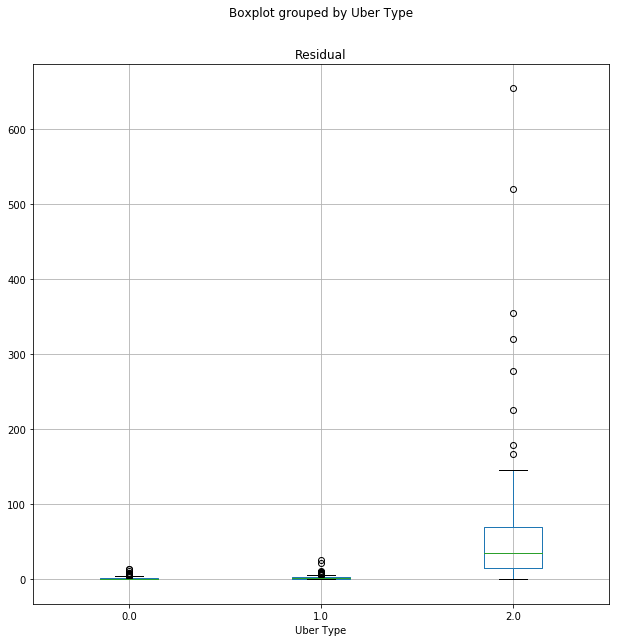

In [114]:
#Use boxplot to identify outliers of Fare
full_data.boxplot(column = 'Residual', by = 'Uber Type', figsize = (10,10))

In [115]:
#The outliers of Fare are described as the dataframe below:
fare_utype0 = full_data[(full_data['Residual'] > 4.1) &
        (full_data['Uber Type'] == 0)]
fare_utype1 = full_data[(full_data['Residual'] > 6.16) &
        (full_data['Uber Type'] == 1)]
fare_utype2 = full_data[(full_data['Residual'] > 150) &
        (full_data['Uber Type'] == 2)]

outliers_fare = pd.concat([fare_utype0, fare_utype1, fare_utype2])
outliers_fare.head(10)

,Arrival Time,Departure Date,Departure Time,Destination Latitude,Destination Longitude,Destination Region,Fare$,Journey Distance(m),Origin Latitude,Origin Longitude,Origin Region,Travel Time(s),Uber Type,Unnamed: 0,Day,Day Time,Predicted Fare,Residual
11,02:21:08,2018-04-12,01:32:51,-37.821461,144.977971,3,6.970,8655.0,-37.861835,144.905716,7,2897.88,0.0,ID1925899672,0,2,14.353492,7.383492
28,22:24:46,2018-05-05,21:34:07,-37.810064,144.930506,5,9.570,10661.0,-37.773803,144.983647,6,3039.90,0.0,ID1953671619,1,2,17.473373,7.903373
33,09:46:07,2018-05-02,08:45:49,-37.816808,145.007359,3,3.595,11446.0,-37.861835,144.905716,7,3618.78,0.0,ID1163468061,0,0,8.822852,5.227852
37,22:54:11,2018-03-21,19:47:03,-37.808027,144.993274,3,11.280,46551.0,-38.110916,144.654173,9,11228.52,0.0,ID1675897230,0,1,22.338251,11.058251
41,02:52:20,2018-05-04,23:42:13,-38.110916,144.654173,9,12.100,47035.0,-37.787442,144.980409,6,11407.86,0.0,ID1246342314,0,2,25.771372,13.671372
49,22:17:01,2018-06-17,22:08:56,-37.812094,144.954211,1,6.080,1953.0,-37.806680,144.937679,5,485.64,0.0,ID1123559233,1,2,14.332256,8.252256
79,05:31:43,2018-06-10,02:41:42,-38.110916,144.654173,9,13.535,42581.0,-37.811841,144.938955,2,10201.08,0.0,ID1443814274,1,2,27.043229,13.508229
88,19:45:29,2018-04-02,19:23:38,-37.790797,144.985865,6,4.220,4696.0,-37.802957,144.948279,1,1311.30,0.0,ID1611226440,0,1,9.324312,5.104312
91,11:57:14,2018-06-02,11:02:36,-37.861835,144.905716,7,6.005,9879.0,-37.812728,144.942521,2,3278.94,0.0,ID1123972501,1,0,11.153860,5.148860
95,01:05:05,2018-01-01,00:44:01,-37.824432,144.988745,3,4.750,5232.0,-37.807202,145.026637,8,1264.56,0.0,ID1557027072,0,2,12.563083,7.813083


In [116]:
#Remove outliers
outliers = outliers.drop(outliers.index[[11, 28, 33, 37, 41,
                            49, 79, 88, 91, 95]])

In [117]:
#Let's take a look at data file
outliers.head()

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,0,ID3789090373,1,7,5,-37.861835,144.905716,-37.808145,144.928992,11310.0,2018-01-14,03:26:20,3660.96,4:27:20,36.21
1,1,ID1917019507,0,5,2,-37.804136,144.917720,-37.814805,144.944860,3090.0,2018-06-10,09:37:54,724.26,9:49:58,9.55
2,2,ID1466639867,0,2,1,-37.818009,144.945916,-37.817401,144.970546,2544.0,2018-01-19,11:05:04,618.78,11:15:22,3.53
3,3,ID3915387451,1,4,1,-37.812907,145.013014,-37.818835,144.954676,5795.0,2018-05-08,18:43:17,1390.74,19:06:27,15.11
4,4,ID1116776465,0,1,8,-37.816568,144.966664,-37.815834,145.046450,7493.0,2018-04-25,02:42:00,2182.38,3:18:22,13.25


In [118]:
#Make some adjustments to dirty data
outliers = outliers.drop(['Unnamed: 0'], axis = 1)
outliers.rename(columns={'Unnamed: 0.1': 'Unnamed: 0'}, inplace=True)
outliers

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3789090373,1,7,5,-37.861835,144.905716,-37.808145,144.928992,11310.0,2018-01-14,03:26:20,3660.96,4:27:20,36.210
1,ID1917019507,0,5,2,-37.804136,144.917720,-37.814805,144.944860,3090.0,2018-06-10,09:37:54,724.26,9:49:58,9.550
2,ID1466639867,0,2,1,-37.818009,144.945916,-37.817401,144.970546,2544.0,2018-01-19,11:05:04,618.78,11:15:22,3.530
3,ID3915387451,1,4,1,-37.812907,145.013014,-37.818835,144.954676,5795.0,2018-05-08,18:43:17,1390.74,19:06:27,15.110
4,ID1116776465,0,1,8,-37.816568,144.966664,-37.815834,145.046450,7493.0,2018-04-25,02:42:00,2182.38,3:18:22,13.250
5,ID3607467064,1,6,3,-37.790818,144.985793,-37.812094,144.988672,2850.0,2018-06-23,03:40:57,680.94,3:52:17,20.490
6,ID1446358777,0,3,9,-37.815262,144.975149,-38.110916,144.654173,44541.0,2018-07-14,04:16:19,10790.88,7:16:09,27.770
7,ID1267120337,0,1,8,-37.824410,144.955135,-37.815834,145.046450,9482.0,2018-01-10,23:25:53,2791.56,0:12:24,12.600
8,ID3627308812,1,5,9,-37.807936,144.921094,-38.110916,144.654173,44147.0,2018-06-23,23:37:52,10665.24,2:35:37,68.670
9,ID1210989530,0,5,3,-37.814961,144.927553,-37.819150,144.982261,6387.0,2018-02-07,15:53:05,1482.96,16:17:47,7.430


In [119]:
#Writing data to csv file
outliers.to_csv('29911508_outliers_solution.csv')